# Part 1 Exploratory Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv("./hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

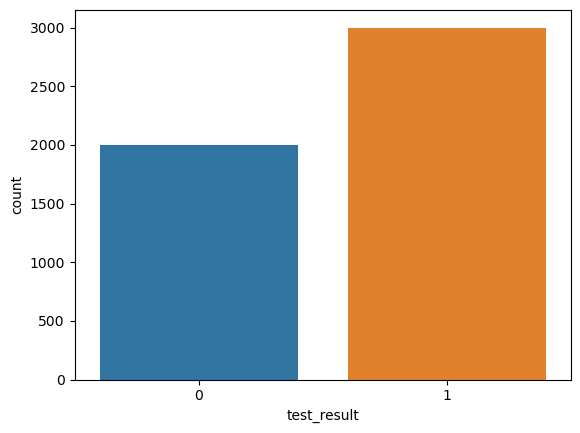

In [5]:
sns.countplot(data = df ,x = "test_result")

<Axes: xlabel='test_result', ylabel='physical_score'>

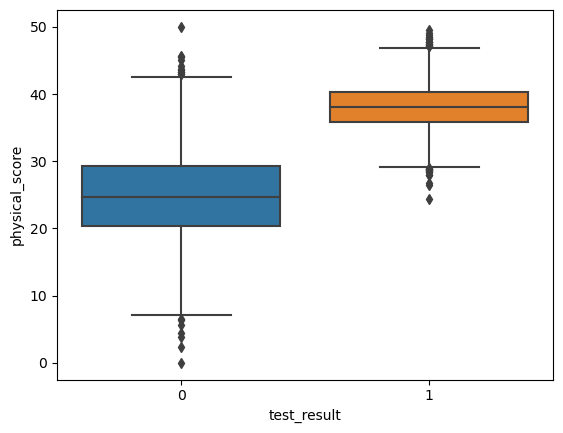

In [6]:
sns.boxplot(data = df ,x = "test_result" ,y = "physical_score")

<Axes: xlabel='test_result', ylabel='age'>

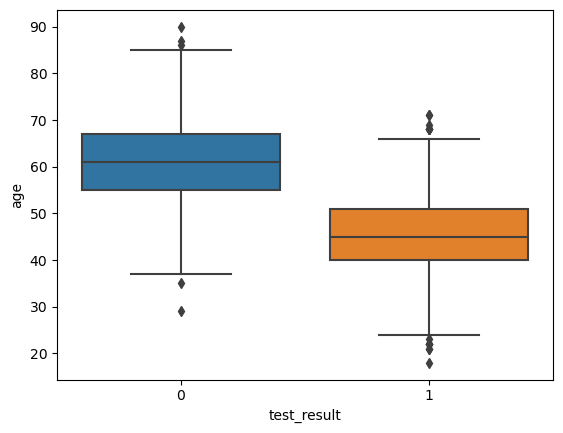

In [7]:
sns.boxplot(data = df ,x = "test_result" ,y = "age")

<Axes: xlabel='age', ylabel='physical_score'>

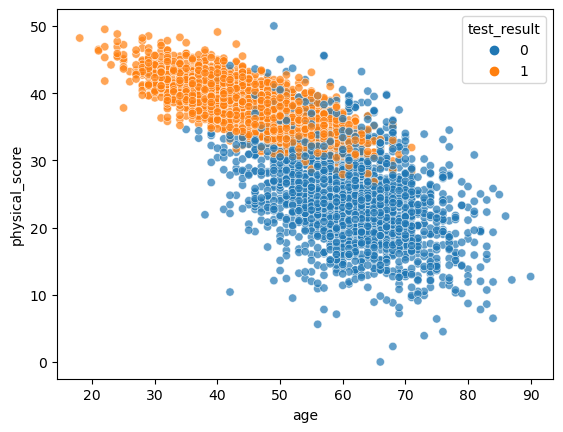

In [8]:
sns.scatterplot(data = df ,y = "physical_score" ,x = "age" ,hue = "test_result" ,alpha = 0.7)

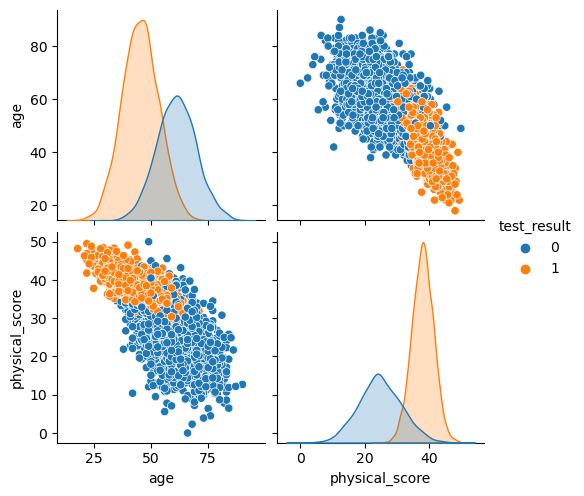

In [9]:
sns.pairplot(data = df ,hue = "test_result")

<Axes: >

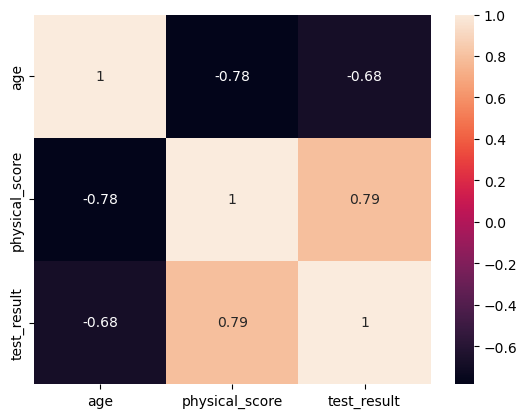

In [10]:
sns.heatmap(df.corr() ,annot = True)

## For 3d plotting

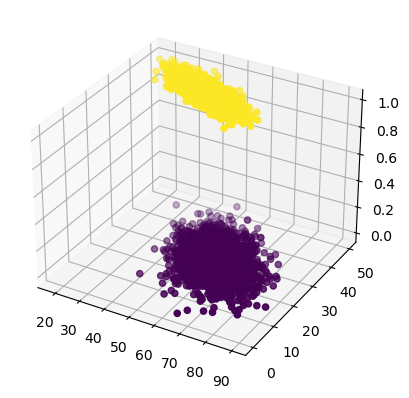

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111 ,projection = "3d")
ax.scatter(df["age"],df["physical_score"],df["test_result"] ,c = df["test_result"])



# Part 2 Creating and Training a Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [13]:
x = df.drop("test_result",axis =1)
y = df["test_result"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [14]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)


In [15]:
model = LogisticRegression( )
model.fit(X_scaled_train ,y_train)

LogisticRegression()

In [27]:
## predict

y_preds = model.predict(X_scaled_test)
y_preds

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [28]:

y_preds1 = model.predict_log_proba(X_scaled_test)
y_preds1

array([[-3.27167223e+00, -3.86815001e-02],
       [-2.15710643e-02, -3.84716862e+00],
       [-3.46547226e+00, -3.17572042e-02],
       ...,
       [-1.28916699e+00, -3.22273770e-01],
       [-5.38851640e+00, -4.57921514e-03],
       [-3.01373557e+00, -5.03546715e-02]])

In [29]:
y_preds2 = model.predict_proba(X_scaled_test)
y_preds2

array([[0.03794292, 0.96205708],
       [0.97865993, 0.02134007],
       [0.03125824, 0.96874176],
       ...,
       [0.27550018, 0.72449982],
       [0.00456875, 0.99543125],
       [0.04910789, 0.95089211]])

# Performance evaluation 

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
accuracy_score(y_test ,y_preds)

0.9084848484848485

In [32]:
print(classification_report(y_test ,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       663
           1       0.91      0.94      0.92       987

    accuracy                           0.91      1650
   macro avg       0.91      0.90      0.90      1650
weighted avg       0.91      0.91      0.91      1650



In [33]:
confusion_matrix(y_test ,y_preds)

array([[573,  90],
       [ 61, 926]], dtype=int64)

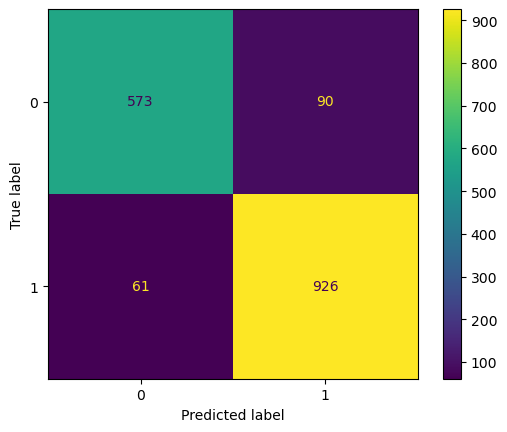

In [38]:
conf = ConfusionMatrixDisplay(confusion_matrix(y_test ,y_preds))
conf.plot()

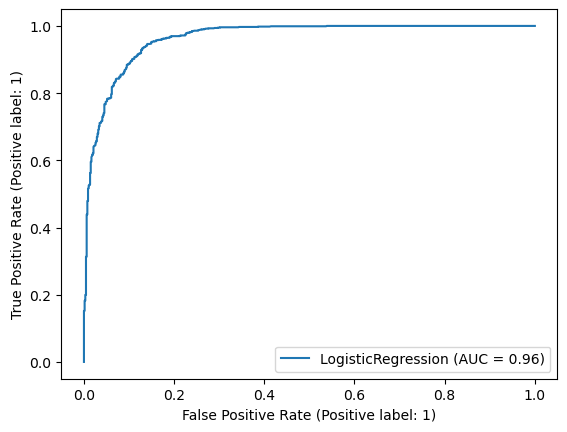

In [39]:
from sklearn.metrics import RocCurveDisplay ,
RocCurveDisplay.from_estimator(model, X_scaled_test, y_test)

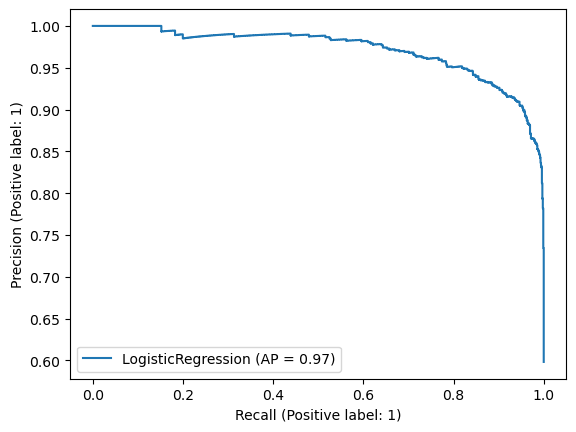

In [40]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, X_scaled_test, y_test)